This pca notebook is designed for self-check your PCA understanding

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
filename = 'iris.data'

In [3]:
#original source: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

def bar_custom(current, total, width=100):
    print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))

#Don't think too much about the getDataset method. It is used for convenience
def getDataset(filename, **kwargs):
    url = f'https://github.com/IvanReznikov/mdx-msc-data-science/raw/main/datasets/{filename}'
    try:
        import os
        if filename not in os.listdir():
            !pip3 install wget
            import wget
            downloaded_filename = wget.download(url)
            print(f'{downloaded_filename} file downloaded', bar=bar_custom)
        else:
            print(f'{filename} already exists')
        return pd.read_csv(filename, **kwargs)
        
    except Exception as e:
        print(e)
        return pd.read_csv(url, **kwargs)

In [4]:
df = pd.read_csv(filename, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

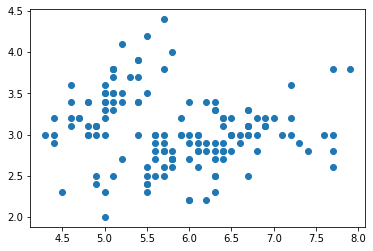

In [7]:
plt.scatter(x[:, 0], x[:, 1])
plt.show()

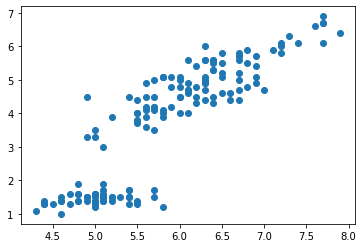

In [8]:
plt.scatter(x[:, 0], x[:, 2])
plt.show()

In [9]:
n_comp = len(x[0])
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(x)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 1.0000
Individual variance contributions:
0.9246162071742684
0.05301556785053506
0.01718513952500679
0.005183085450189931


In [10]:
pd.DataFrame(pca.components_.T, columns=[f'PC{x}' for x in range(n_comp)], index=df.iloc[:,:-1].columns)

,PC0,PC1,PC2,PC3
sepal length,0.361590,0.656540,-0.580997,0.317255
sepal width,-0.082269,0.729712,0.596418,-0.324094
petal length,0.856572,-0.175767,0.072524,-0.479719
petal width,0.358844,-0.074706,0.549061,0.751121


In [11]:
PCA_df = pd.concat([pd.DataFrame(data = X_pca), df[['target']]], axis = 1)
PCA_df.head()

,0,1,2,3,target
0,-2.684207,0.326607,-0.021512,0.001006,Iris-setosa
1,-2.715391,-0.169557,-0.203521,0.099602,Iris-setosa
2,-2.889820,-0.137346,0.024709,0.019305,Iris-setosa
3,-2.746437,-0.311124,0.037672,-0.075955,Iris-setosa
4,-2.728593,0.333925,0.096230,-0.063129,Iris-setosa


In [12]:
cmap = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}

In [13]:
PCA_df['cmap'] = PCA_df['target'].replace(cmap)

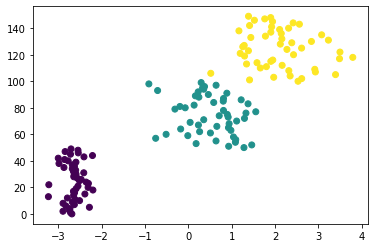

In [14]:
plt.scatter(PCA_df[0], PCA_df.index, c=PCA_df['cmap'])
plt.show()

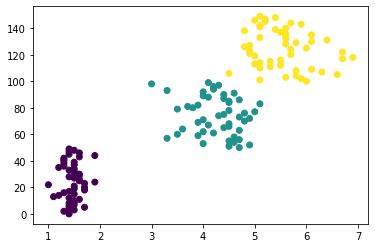

In [15]:
df['cmap'] = df['target'].replace(cmap)
plt.scatter(df['petal length'], df.index, c=df['cmap'])
plt.show()